# Stroke Prediction Using Logistic Regression

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load Datapath = 
df= pd.read_csv(r"E:\stroke_data.csv")

In [3]:
df.shape

(5110, 12)

# Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.20,Unknown,0


# Handling missing values

In [7]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893110,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.isnull().sum().sum()

0

<Axes: >

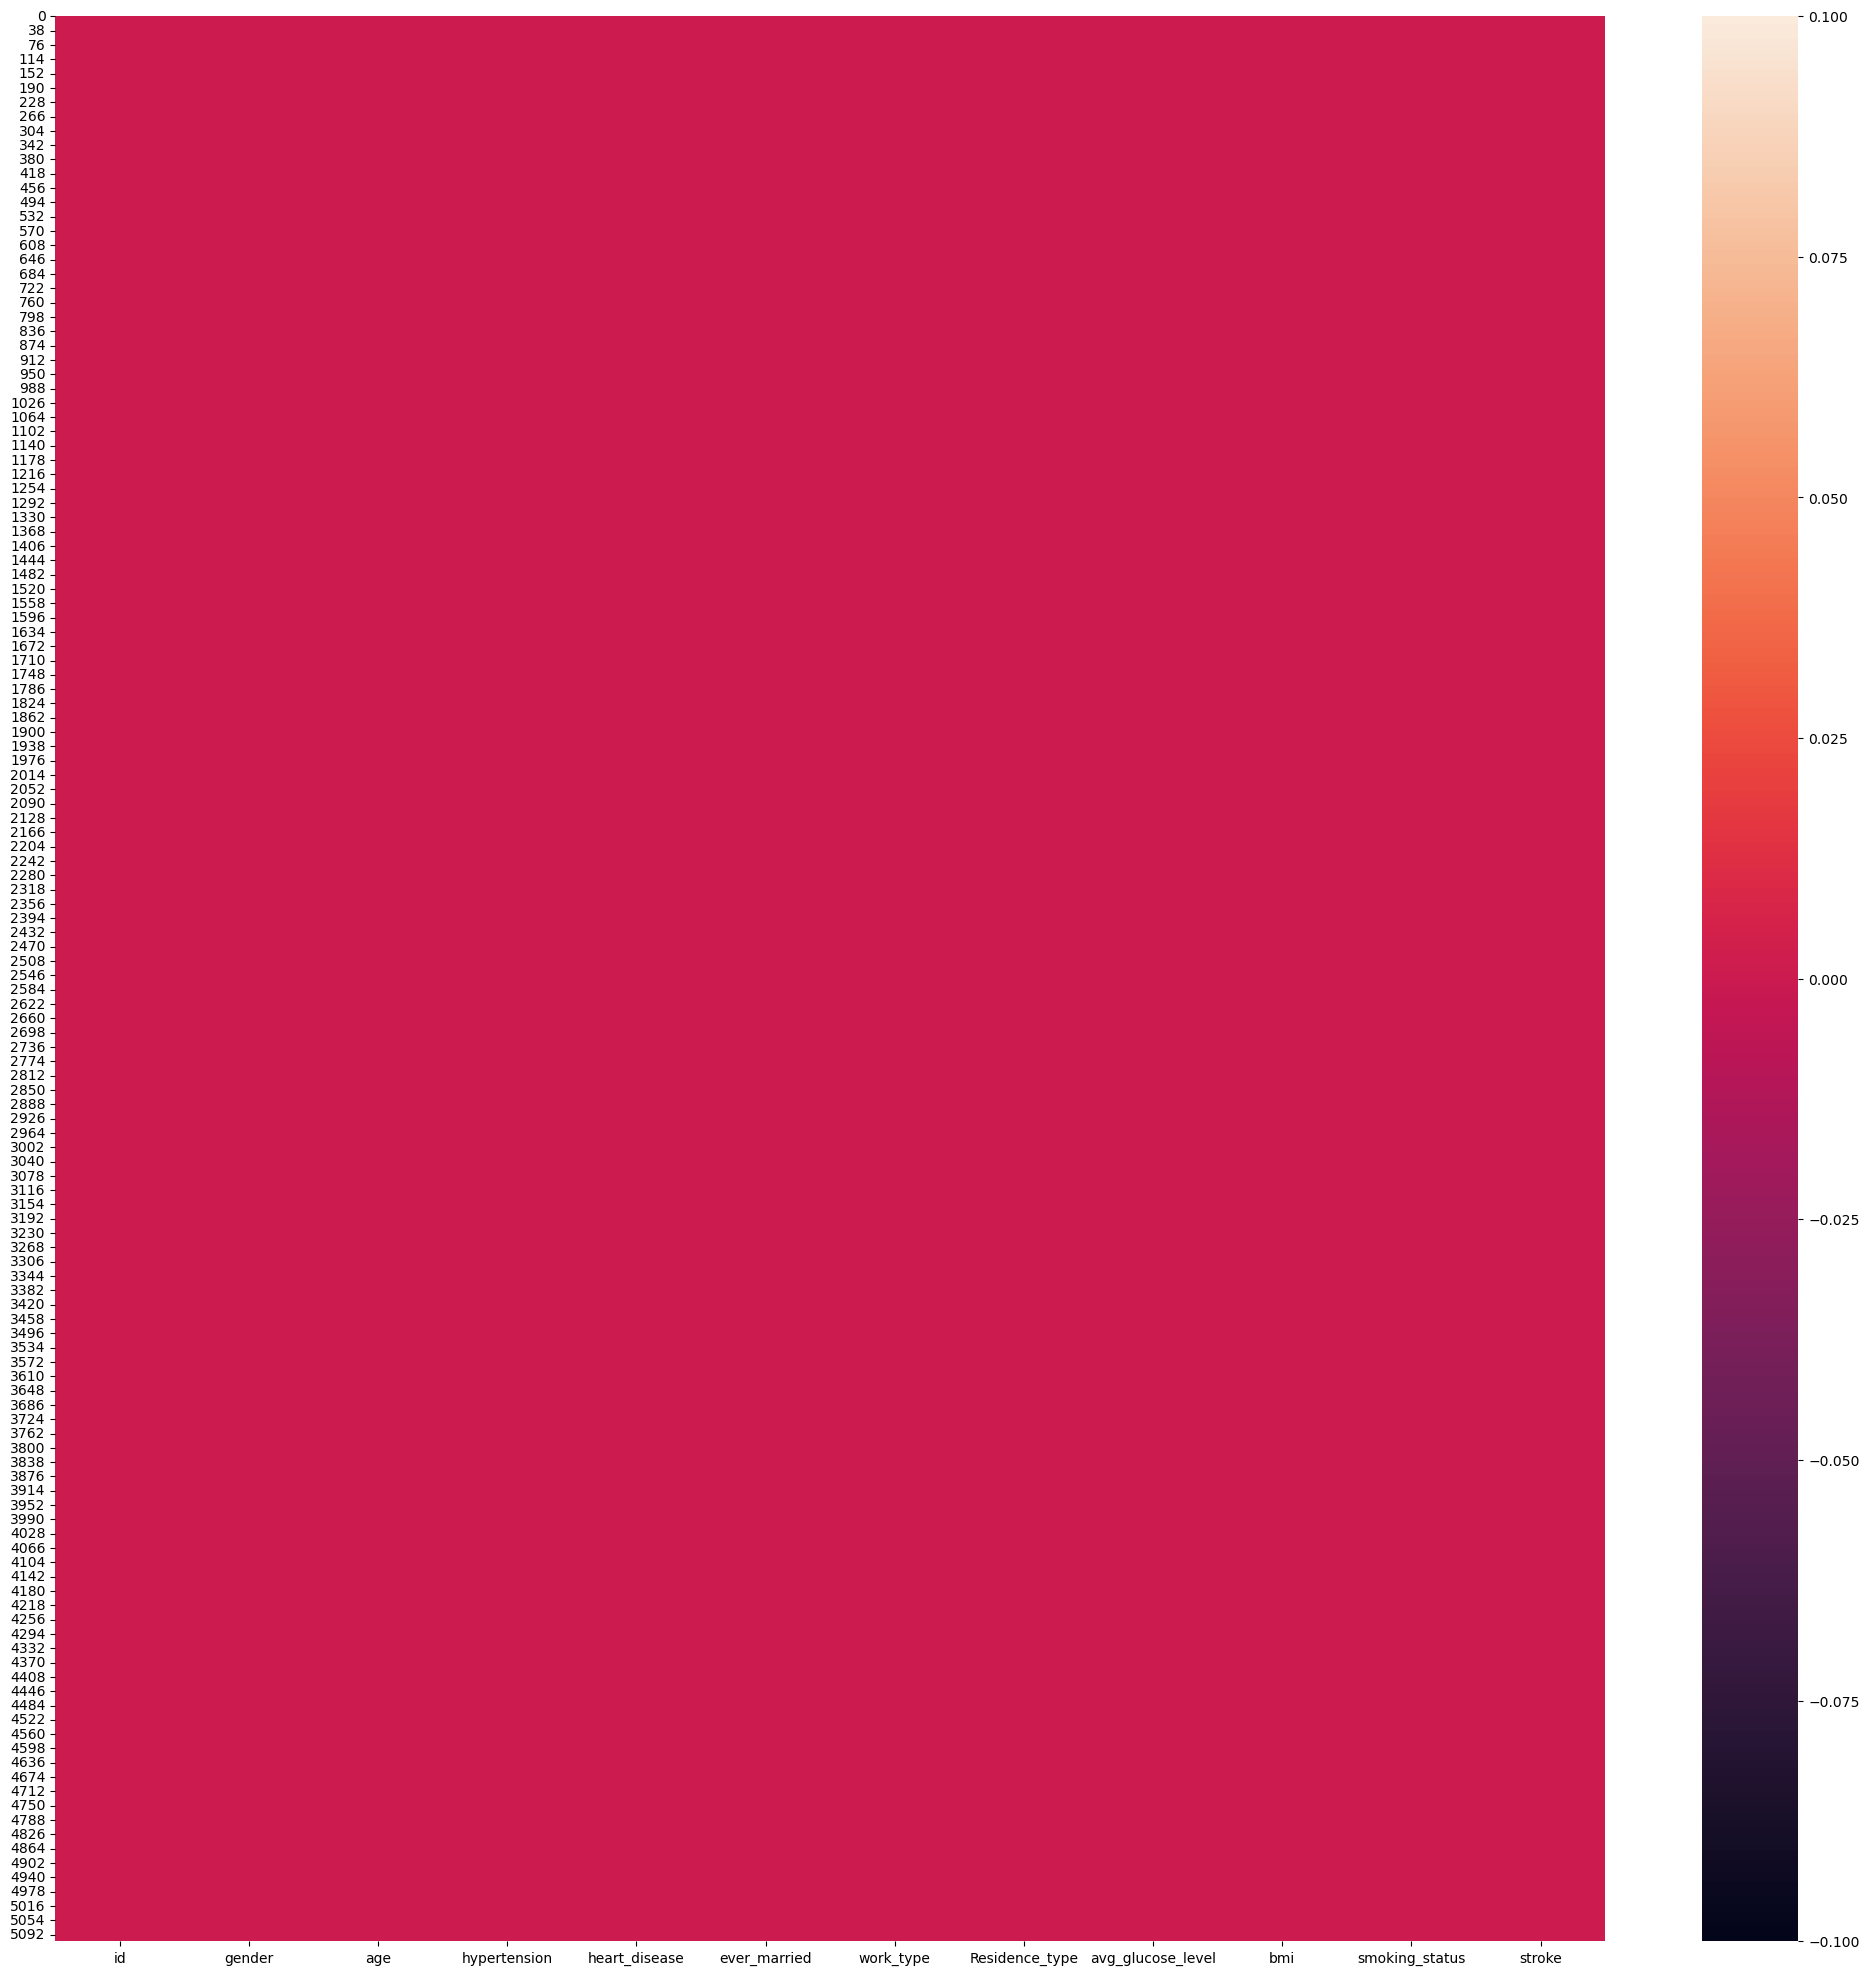

In [11]:
#plot null values using heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

# Visualization of stroke dataset

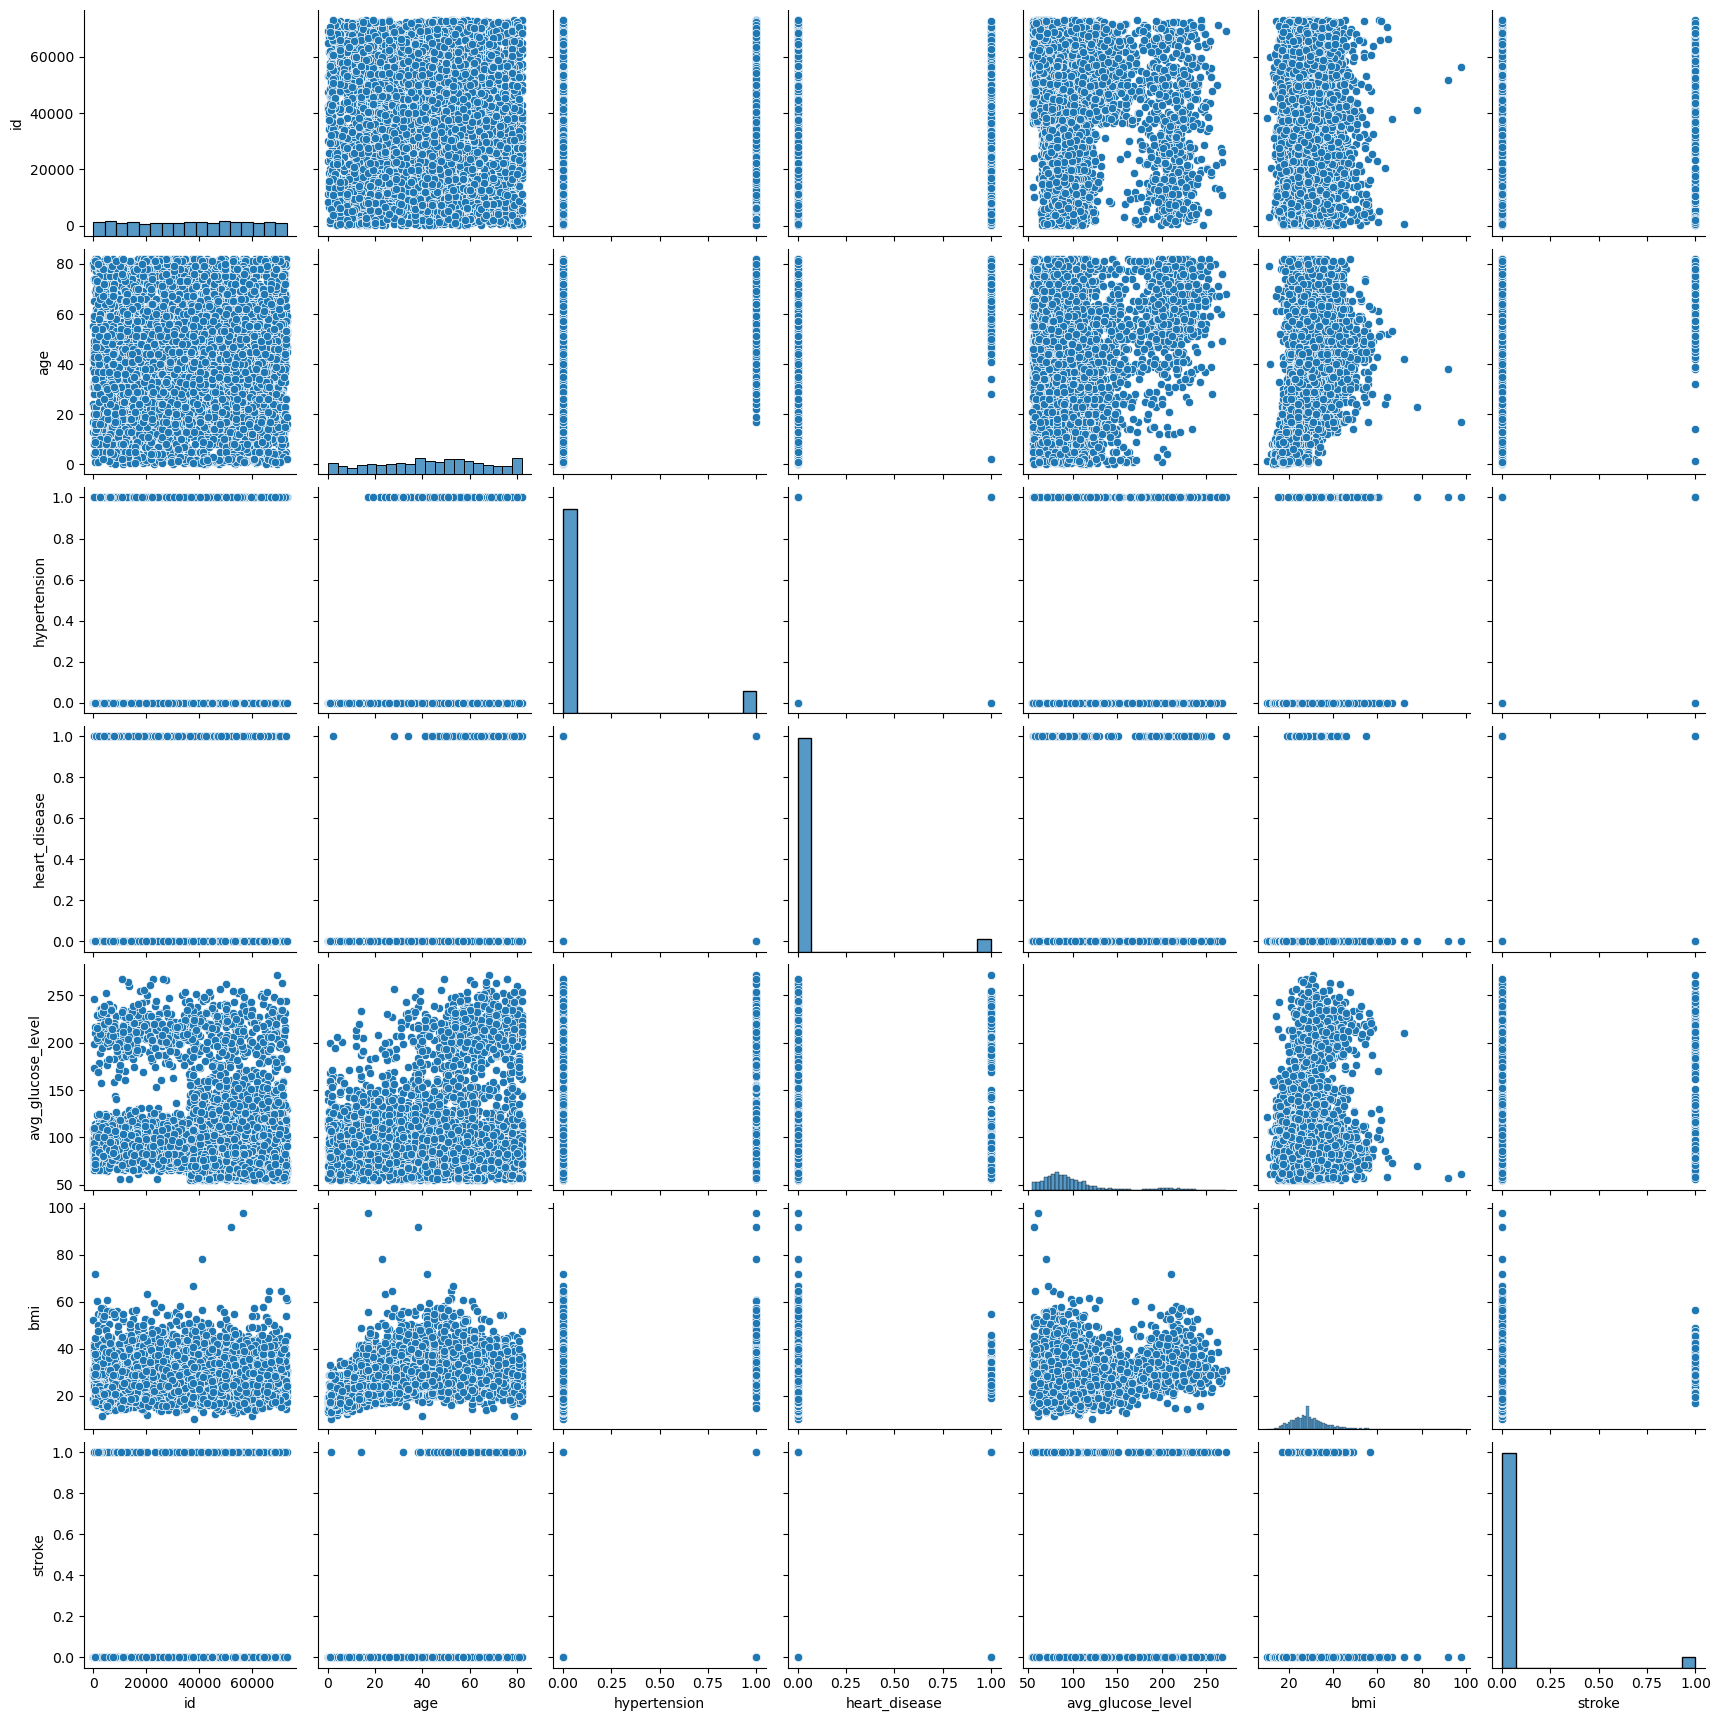

In [12]:
sns.pairplot(df)
plt.show()

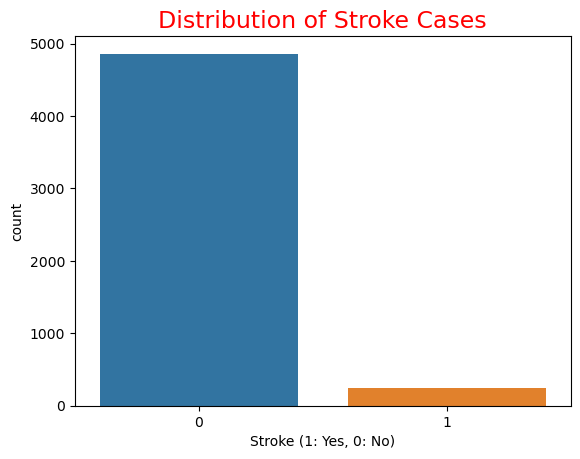

In [13]:
# Countplot to visualize the distribution of stroke cases
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases', fontsize=17, color='r')
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.show()

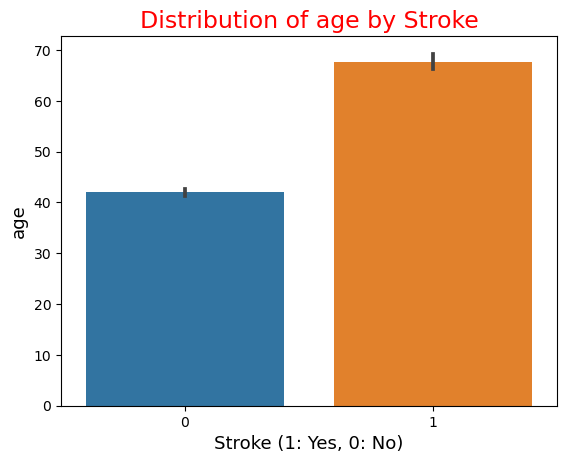

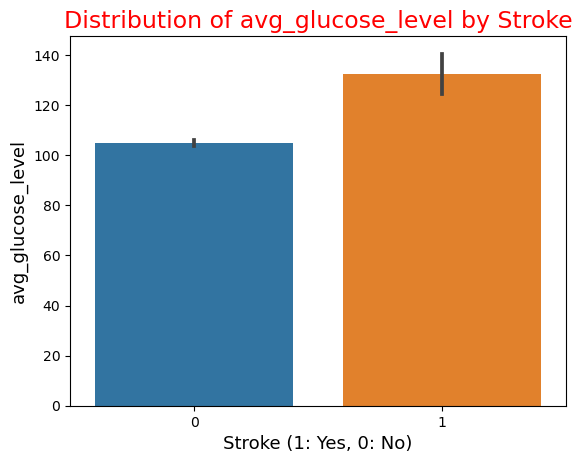

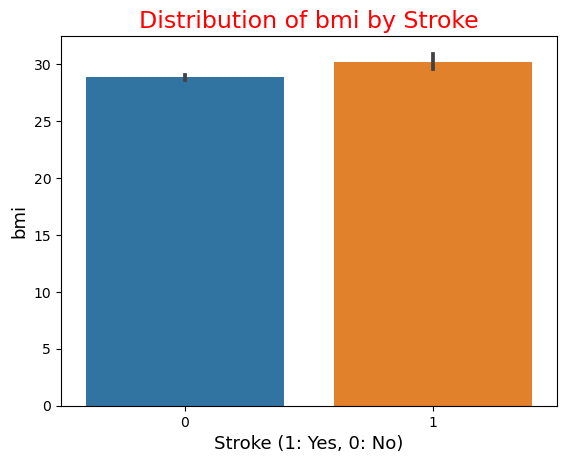

In [14]:
# Boxplots to visualize the distribution of numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi']
for feature in numerical_features:
    sns.barplot(x='stroke', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Stroke',fontsize=17, color='r' )
    plt.xlabel('Stroke (1: Yes, 0: No)', fontsize=13)
    plt.ylabel(feature, fontsize=13)
    plt.show()# split data

# Lable Encoding

**Label encoding is used in classification algorithms to convert categorical labels (e.g., class names) into numerical values, allowing machine learning models to process and make predictions on the data since most algorithms require numerical inputs.**

In [15]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["work_type"] = le.fit_transform(df["work_type"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])
df["smoking_status"] = le.fit_transform(df["smoking_status"])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1


# split data

In [16]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]
X.head()
#In machine learning, data splitting involves dividing a dataset into training and testing (or validation) sets,
#typically to train a model on one subset and 
#evaluate its performance on another to assess its generalization ability.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,1,67.0,0,1,1,2,1,228.69,36.60,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89,2
2,31112,1,80.0,0,1,1,2,0,105.92,32.50,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.40,3
4,1665,0,79.0,1,0,1,3,0,174.12,24.00,2


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
print('shape of X_train=', X_train.shape)
print('shape of y_train=', y_train.shape)
print('shape of X_test=', X_test.shape)
print('shape of y_test=', y_test.shape)


shape of X_train= (4088, 11)
shape of y_train= (4088,)
shape of X_test= (1022, 11)
shape of y_test= (1022,)


# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [19]:
X_train_sc= sc.transform(X_train)
X_test_sc= sc.transform(X_test)

# Training Model

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
dt_sc = classifier.score(X_test, y_test)
dt_sc

0.9119373776908023

# Confusion Matrix 

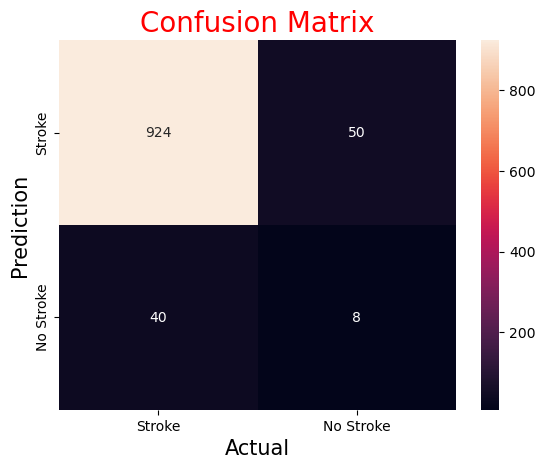

In [22]:
#Plot the confusion matrix.
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Stroke','No Stroke'],
            yticklabels=['Stroke','No Stroke'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=20, color='r')
plt.show()

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
lr_sc = lr.score(X_test,y_test)
lr_sc

0.9530332681017613

# Confusion Matrix 

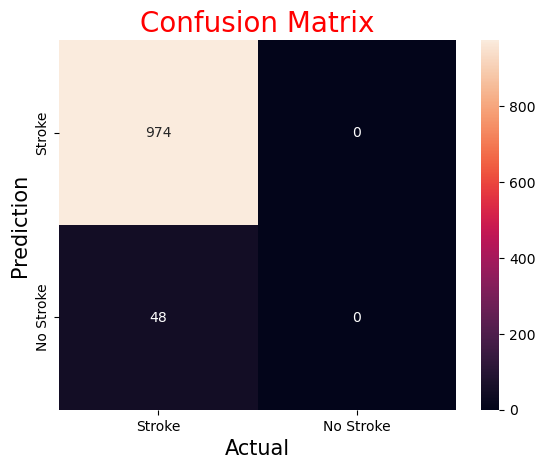

In [25]:
#Plot the confusion matrix.
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Stroke','No Stroke'],
            yticklabels=['Stroke','No Stroke'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=20, color='r')
plt.show()

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)# Create a Random Forest classifier with 100 trees
rf.fit(X_train_sc, y_train)# Train the classifier using the training data

RandomForestClassifier()

In [27]:
# Calculate the accuracy score on the test data
rf_sc = classifier.score(X_test_sc, y_test)
rf_sc

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.9530332681017613

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


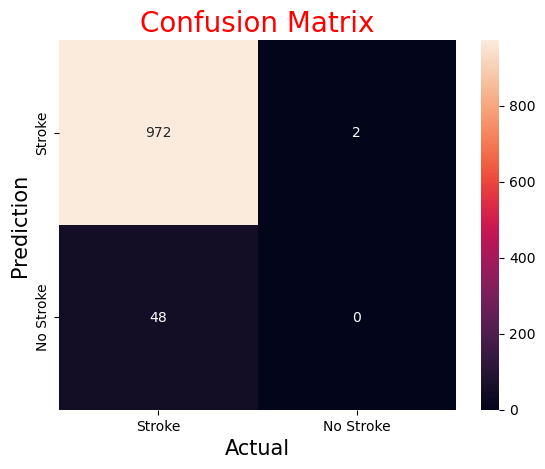

In [28]:
#Plot the confusion matrix.
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Stroke','No Stroke'],
            yticklabels=['Stroke','No Stroke'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=20, color='r')
plt.show()# Confusion Matrix 

# K-Fold Cross Validation Technique

In [29]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(LogisticRegression(),X,y,cv=3)
print(score_lr)
print("Avg:",np.average(score_lr))

[0.95011737 0.94950088 0.95008808]
Avg: 0.9499021105165606


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**This code helps you assess how well your Logistic Regression model performs on different subsets of your data and provides an average score for its performance.**

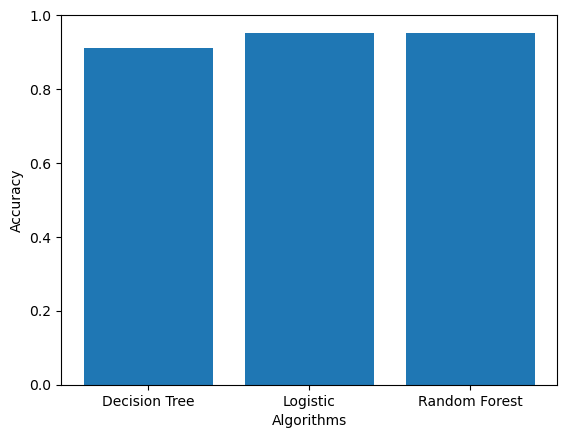

In [30]:
plt.bar(['Decision Tree', 'Logistic', 'Random Forest'],[dt_sc,lr_sc,rf_sc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()